In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
sns.set_palette("deep")

In [2]:
import os 
os.getcwd()

'/Users/damini'

In [10]:
data = pd.read_excel('/Users/damini/Downloads/Sales_Data.xlsx')

### Problem Statement:

An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

#### Data dictonary :

* ORDERNUMBER : Order Number

* CUSTOMERNAME : customer

* QUANTITYORDERED : Quantity ordered

* PHONE : Phone of the customer

* PRICEEACH : Price of Each item

* ADDRESSLINE1 : Address of customer

* ORDERLINENUMBER : order line

* CITY : City of customer

* SALES : Sales amount

* POSTALCODE : Postal Code of customer

* ORDERDATE : Order Date

* COUNTRY : Country customer

* DAYS_SINCE_LASTORDER : Days_ Since_Lastorder

* CONTACTLASTNAME : Contact person customer

* STATUS : Status of order like Shipped or not

* CONTACTFIRSTNAME : Contact person customer

* PRODUCTLINE : Product line – CATEGORY

* DEALSIZE : Size of the deal based on Quantity and Item Price

* MSRP : Manufacturer's Suggested Retail Price

* PRODUCTCODE : Code of Product

#### Head :


In [11]:
data.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,2018-11-11,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,2018-11-18,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,2019-01-15,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,2019-02-20,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,2019-04-05,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


#### Informatio - info :

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

#### Shape :

In [8]:
data.shape

(2747, 20)

####  Summary :

In [7]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


#### Missing Values :

In [9]:
data.isnull().any()

ORDERNUMBER             False
QUANTITYORDERED         False
PRICEEACH               False
ORDERLINENUMBER         False
SALES                   False
ORDERDATE               False
DAYS_SINCE_LASTORDER    False
STATUS                  False
PRODUCTLINE             False
MSRP                    False
PRODUCTCODE             False
CUSTOMERNAME            False
PHONE                   False
ADDRESSLINE1            False
CITY                    False
POSTALCODE              False
COUNTRY                 False
CONTACTLASTNAME         False
CONTACTFIRSTNAME        False
DEALSIZE                False
dtype: bool

#### Assumptions :

* The data has 2747 rows and 20 columns.
* The data is from all around the world.
* There are no nulls in the data.
* There is no need of clean the data.

<function matplotlib.pyplot.show(close=None, block=None)>

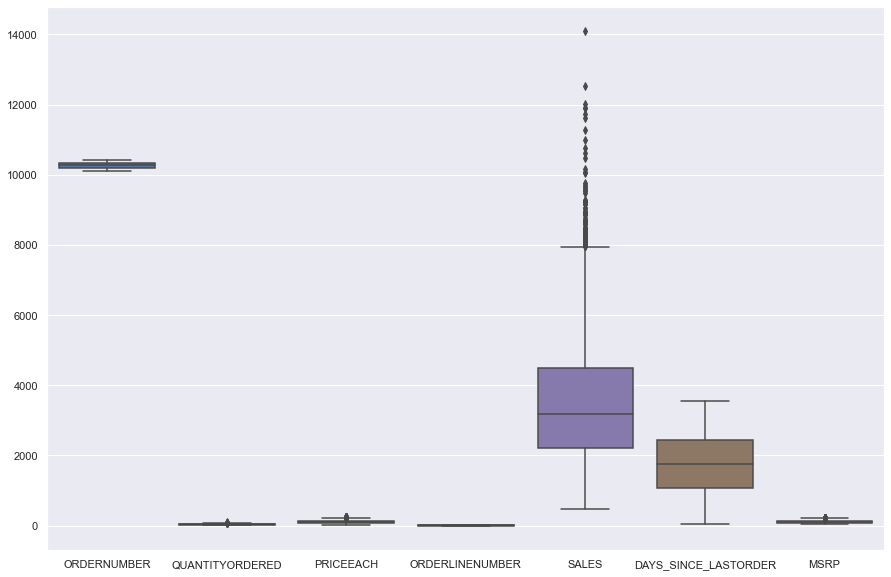

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.show

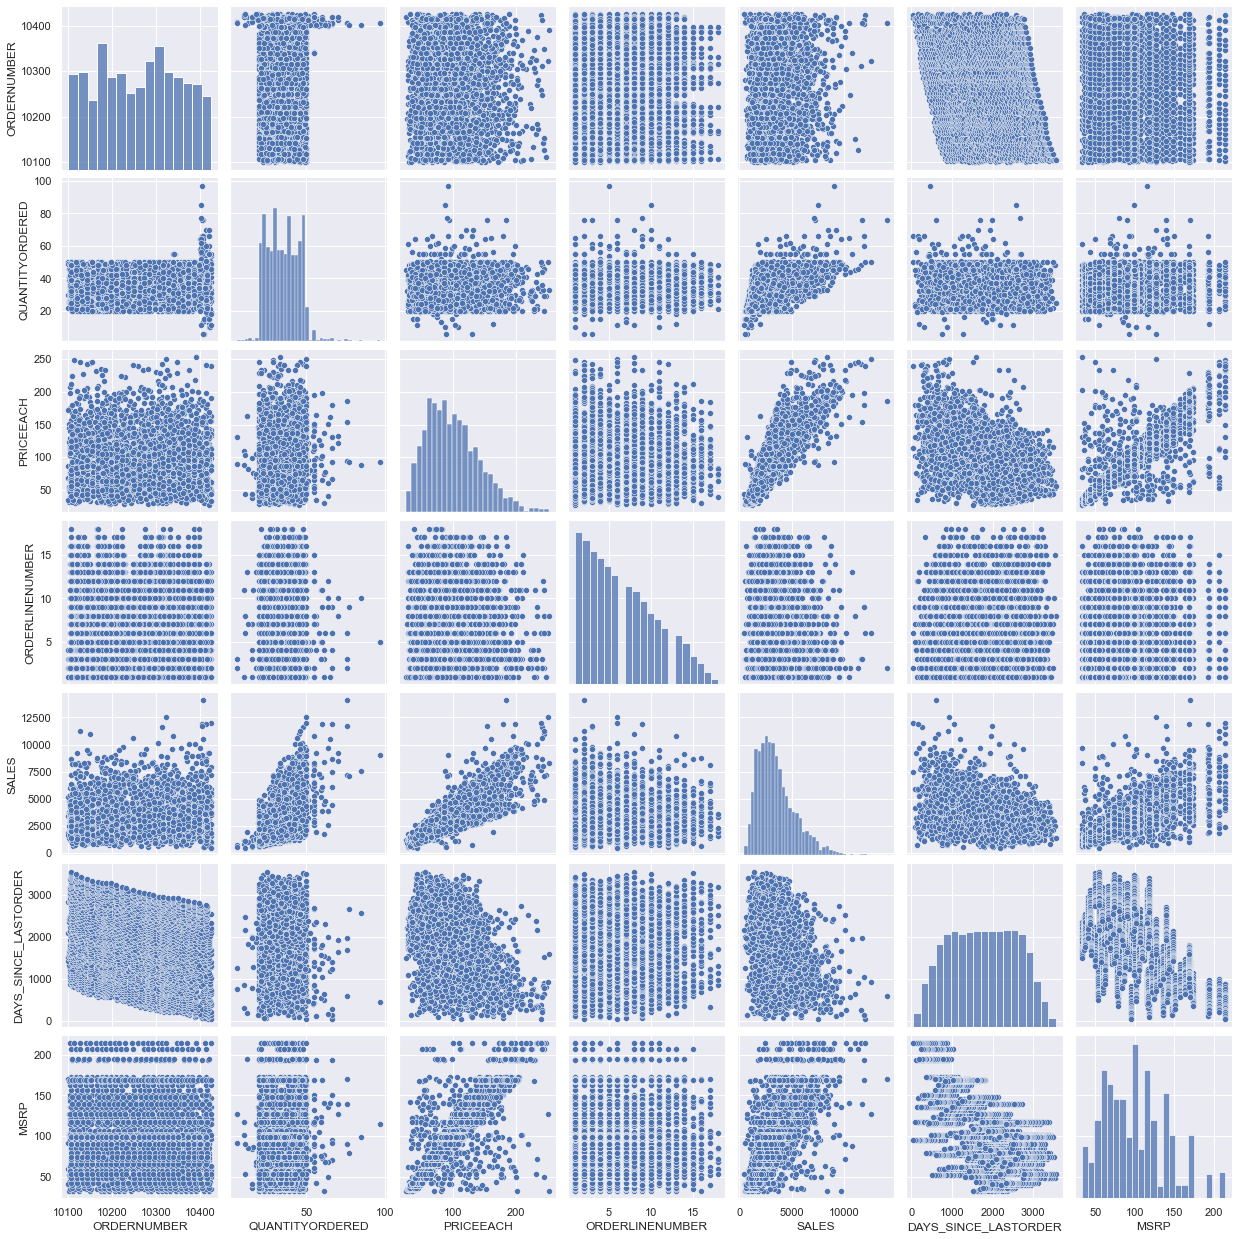

In [28]:
sns.pairplot(data=data)

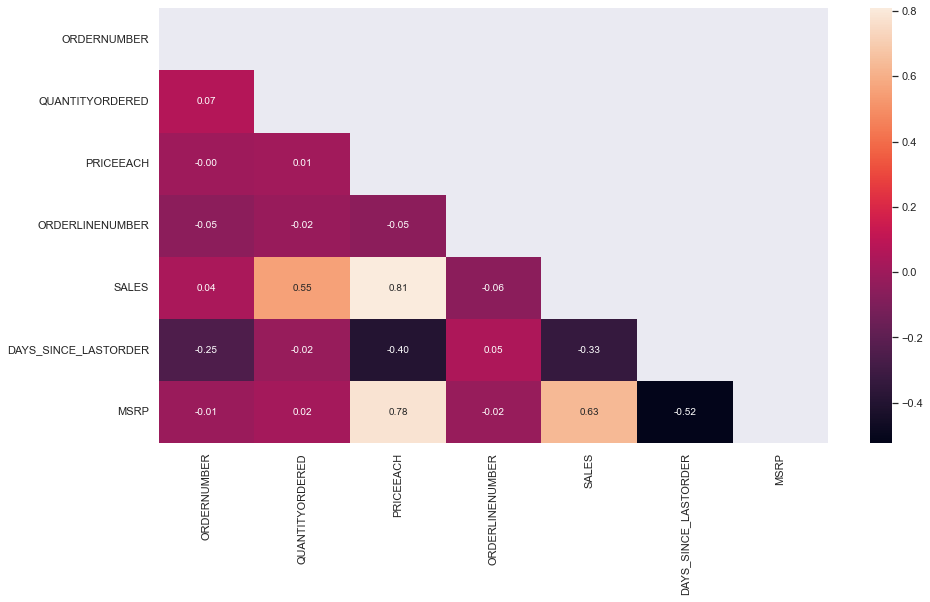

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,fmt=".2f",mask=np.triu(data.corr(),0));

<AxesSubplot:xlabel='SALES'>

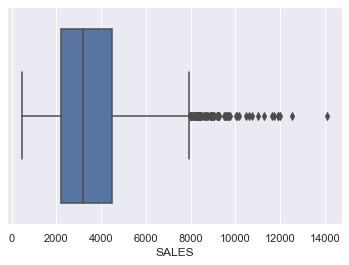

In [37]:
sns.boxplot(data['SALES'])

<AxesSubplot:xlabel='SALES', ylabel='Density'>

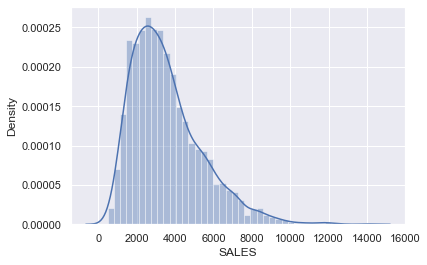

In [41]:
sns.distplot(data['SALES'])

<AxesSubplot:xlabel='QUANTITYORDERED'>

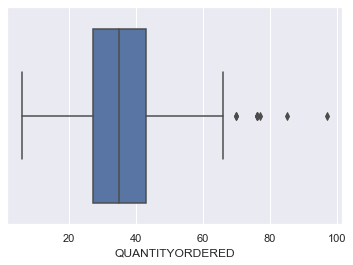

In [38]:
sns.boxplot(data['QUANTITYORDERED'])

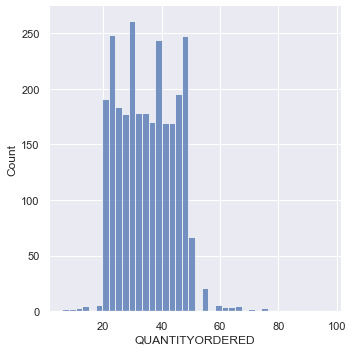

In [42]:
sns.displot(data['QUANTITYORDERED'])

In [51]:
df = pd.read_excel('/Users/damini/Downloads/KNIME_DAMINI_KUMAR.xlsx')

In [52]:
df.head()

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
0,"AV Stores, Co.",51.0,34.862745,91.084510,18.0,3094.270784,51.0,421.0,51.0,51.0,...,51.0,157807.81,980.0,Bin 4,Bin 4,Bin 3,2,4,4,244
1,Alpha Cognac,20.0,34.350000,101.160000,12.0,3524.422000,20.0,675.0,20.0,20.0,...,20.0,70488.44,848.0,Bin 1,Bin 1,Bin 1,4,1,1,411
2,Amica Models & Co.,26.0,32.423077,110.852692,17.0,3619.894615,26.0,328.0,26.0,26.0,...,26.0,94117.26,1049.0,Bin 2,Bin 3,Bin 4,1,2,3,123
3,"Anna's Decorations, Ltd",46.0,31.934783,106.424130,14.0,3347.741957,46.0,131.0,46.0,46.0,...,46.0,153996.13,867.0,Bin 4,Bin 4,Bin 2,3,4,4,344
4,Atelier graphique,7.0,38.571429,92.238571,4.0,3454.280000,7.0,312.0,7.0,7.0,...,7.0,24179.96,972.0,Bin 1,Bin 1,Bin 3,2,1,1,211


### BEST CUSTOMERS :-

In [56]:
df[df["Concatenate"]==444]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
26,Danish Wholesale Imports,36.0,36.527778,108.037778,15.0,4028.933333,36.0,499.0,36.0,36.0,...,36.0,145041.60,830.0,Bin 4,Bin 4,Bin 1,4,4,4,444
32,Euro Shopping Channel,259.0,36.011583,97.383205,18.0,3522.371081,259.0,42.0,259.0,259.0,...,259.0,912294.11,784.0,Bin 4,Bin 4,Bin 1,4,4,4,444
41,L'ordine Souveniers,39.0,32.820513,111.147436,15.0,3656.444359,39.0,493.0,39.0,39.0,...,39.0,142601.33,805.0,Bin 4,Bin 4,Bin 1,4,4,4,444
43,La Rochelle Gifts,53.0,34.566038,97.046398,18.0,3398.583019,53.0,139.0,53.0,53.0,...,53.0,180124.90,784.0,Bin 4,Bin 4,Bin 1,4,4,4,444
53,Mini Gifts Distributors Ltd.,180.0,35.366667,102.696336,17.0,3638.100333,180.0,219.0,180.0,180.0,...,180.0,654858.06,786.0,Bin 4,Bin 4,Bin 1,4,4,4,444
63,Reims Collectables,41.0,34.951220,94.342927,18.0,3293.730244,41.0,287.0,41.0,41.0,...,41.0,135042.94,846.0,Bin 4,Bin 4,Bin 1,4,4,4,444
67,Salzburg Collectables,40.0,36.050000,101.397750,14.0,3744.965750,40.0,188.0,40.0,40.0,...,40.0,149798.63,798.0,Bin 4,Bin 4,Bin 1,4,4,4,444
72,Souveniers And Things Co.,46.0,34.804348,95.189348,14.0,3295.021304,46.0,186.0,46.0,46.0,...,46.0,151570.98,786.0,Bin 4,Bin 4,Bin 1,4,4,4,444
78,The Sharp Gifts Warehouse,40.0,41.400000,93.375750,14.0,4000.256750,40.0,182.0,40.0,40.0,...,40.0,160010.27,823.0,Bin 4,Bin 4,Bin 1,4,4,4,444


### CUSTOMER LOST :-

In [57]:
df[df["Concatenate"]==111]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
8,Auto Assoc. & Cie.,18.0,35.388889,99.487801,17.0,3601.906667,18.0,275.0,18.0,18.0,...,18.0,64834.32,1017.0,Bin 1,Bin 1,Bin 4,1,1,1,111
12,"Bavarian Collectables Imports, Co.",14.0,28.642857,84.289286,14.0,2499.565714,14.0,801.0,14.0,14.0,...,14.0,34993.92,1043.0,Bin 1,Bin 1,Bin 4,1,1,1,111
15,CAF Imports,13.0,36.000000,104.963077,11.0,3818.619231,13.0,625.0,13.0,13.0,...,13.0,49642.05,1223.0,Bin 1,Bin 1,Bin 4,1,1,1,111
16,Cambridge Collectables Co.,11.0,32.454545,101.329091,6.0,3287.601818,11.0,484.0,11.0,11.0,...,11.0,36163.62,1173.0,Bin 1,Bin 1,Bin 4,1,1,1,111
20,"Clover Collections, Co.",16.0,30.625000,112.870000,9.0,3609.776875,16.0,659.0,16.0,16.0,...,16.0,57756.43,1042.0,Bin 1,Bin 1,Bin 4,1,1,1,111
25,Daedalus Designs Imports,20.0,34.950000,95.474000,14.0,3452.620500,20.0,573.0,20.0,20.0,...,20.0,69052.41,1249.0,Bin 1,Bin 1,Bin 4,1,1,1,111
29,"Double Decker Gift Stores, Ltd",12.0,29.750000,99.108333,9.0,3001.586667,12.0,670.0,12.0,12.0,...,12.0,36019.04,1279.0,Bin 1,Bin 1,Bin 4,1,1,1,111
40,"Iberia Gift Imports, Corp.",15.0,39.266667,93.282667,13.0,3648.241333,15.0,904.0,15.0,15.0,...,15.0,54723.62,1022.0,Bin 1,Bin 1,Bin 4,1,1,1,111
58,Online Mini Collectables,15.0,38.133333,94.680667,14.0,3813.197333,15.0,467.0,15.0,15.0,...,15.0,57197.96,1048.0,Bin 1,Bin 1,Bin 4,1,1,1,111
59,Osaka Souveniers Co.,20.0,34.600000,99.914000,17.0,3380.253500,20.0,563.0,20.0,20.0,...,20.0,67605.07,1198.0,Bin 1,Bin 1,Bin 4,1,1,1,111


### CUSTOMER LOYAL :-

In [66]:
df[df["Concatenate"]==443]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
37,Handji Gifts& Co,36.0,34.333333,95.592778,14.0,3208.298056,36.0,488.0,36.0,36.0,...,36.0,115498.73,822.0,Bin 4,Bin 3,Bin 1,4,4,3,443


In [67]:
df[df["Concatenate"]==444]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
26,Danish Wholesale Imports,36.0,36.527778,108.037778,15.0,4028.933333,36.0,499.0,36.0,36.0,...,36.0,145041.60,830.0,Bin 4,Bin 4,Bin 1,4,4,4,444
32,Euro Shopping Channel,259.0,36.011583,97.383205,18.0,3522.371081,259.0,42.0,259.0,259.0,...,259.0,912294.11,784.0,Bin 4,Bin 4,Bin 1,4,4,4,444
41,L'ordine Souveniers,39.0,32.820513,111.147436,15.0,3656.444359,39.0,493.0,39.0,39.0,...,39.0,142601.33,805.0,Bin 4,Bin 4,Bin 1,4,4,4,444
43,La Rochelle Gifts,53.0,34.566038,97.046398,18.0,3398.583019,53.0,139.0,53.0,53.0,...,53.0,180124.90,784.0,Bin 4,Bin 4,Bin 1,4,4,4,444
53,Mini Gifts Distributors Ltd.,180.0,35.366667,102.696336,17.0,3638.100333,180.0,219.0,180.0,180.0,...,180.0,654858.06,786.0,Bin 4,Bin 4,Bin 1,4,4,4,444
63,Reims Collectables,41.0,34.951220,94.342927,18.0,3293.730244,41.0,287.0,41.0,41.0,...,41.0,135042.94,846.0,Bin 4,Bin 4,Bin 1,4,4,4,444
67,Salzburg Collectables,40.0,36.050000,101.397750,14.0,3744.965750,40.0,188.0,40.0,40.0,...,40.0,149798.63,798.0,Bin 4,Bin 4,Bin 1,4,4,4,444
72,Souveniers And Things Co.,46.0,34.804348,95.189348,14.0,3295.021304,46.0,186.0,46.0,46.0,...,46.0,151570.98,786.0,Bin 4,Bin 4,Bin 1,4,4,4,444
78,The Sharp Gifts Warehouse,40.0,41.400000,93.375750,14.0,4000.256750,40.0,182.0,40.0,40.0,...,40.0,160010.27,823.0,Bin 4,Bin 4,Bin 1,4,4,4,444


In [68]:
df[df["Concatenate"]==433]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
9,Auto Canal Petit,27.0,37.074074,94.255185,15.0,3450.765185,27.0,127.0,27.0,27.0,...,27.0,93170.66,838.0,Bin 3,Bin 3,Bin 1,4,3,3,433
79,"Tokyo Collectables, Ltd",32.0,35.937500,101.182812,16.0,3767.585625,32.0,259.0,32.0,32.0,...,32.0,120562.74,823.0,Bin 3,Bin 3,Bin 1,4,3,3,433
83,"UK Collectables, Ltd.",29.0,36.068966,108.535517,14.0,4069.250690,29.0,76.0,29.0,29.0,...,29.0,118008.27,837.0,Bin 3,Bin 3,Bin 1,4,3,3,433


### CUSTOMERS ON THE VERGE OF CHURNING:-

In [59]:
df[df["Concatenate"]==144]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
68,"Saveley & Henriot, Co.",41.0,34.829268,100.548049,15.0,3484.737805,41.0,586.0,41.0,41.0,...,41.0,142874.25,1240.0,Bin 4,Bin 4,Bin 4,1,4,4,144


In [61]:
df[df["Concatenate"]==123]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
2,Amica Models & Co.,26.0,32.423077,110.852692,17.0,3619.894615,26.0,328.0,26.0,26.0,...,26.0,94117.26,1049.0,Bin 2,Bin 3,Bin 4,1,2,3,123


In [62]:
df[df["Concatenate"]==112]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
28,Diecast Collectables,18.0,38.611111,101.783333,16.0,3936.654444,18.0,672.0,18.0,18.0,...,18.0,70859.78,1185.0,Bin 1,Bin 2,Bin 4,1,1,2,112
75,Super Scale Inc.,17.0,37.411765,128.452353,9.0,4674.827647,17.0,430.0,17.0,17.0,...,17.0,79472.07,1177.0,Bin 1,Bin 2,Bin 4,1,1,2,112


In [65]:
df[df["Concatenate"]==133]

,CUSTOMERNAME,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,...,DEALSIZE,Monetary,Recency,ORDERNUMBER [Binned],Monetary [Binned],Recency [Binned],Recency_Bins,Frequency_bins,Monetary_Bins,Concatenate
39,Herkku Gifts,29.0,33.551724,113.558621,17.0,3849.664828,29.0,567.0,29.0,29.0,...,29.0,111640.28,1055.0,Bin 3,Bin 3,Bin 4,1,3,3,133
47,Marta's Replicas Co.,27.0,36.148148,107.071852,14.0,3817.791852,27.0,292.0,27.0,27.0,...,27.0,103080.38,1015.0,Bin 3,Bin 3,Bin 4,1,3,3,133
84,"Vida Sport, Ltd",31.0,34.774194,112.075161,17.0,3797.211613,31.0,440.0,31.0,31.0,...,31.0,117713.56,1059.0,Bin 3,Bin 3,Bin 4,1,3,3,133


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUSTOMERNAME          89 non-null     object 
 1   ORDERNUMBER           89 non-null     float64
 2   QUANTITYORDERED       89 non-null     float64
 3   PRICEEACH             89 non-null     float64
 4   ORDERLINENUMBER       89 non-null     float64
 5   SALES                 89 non-null     float64
 6   ORDERDATE             89 non-null     float64
 7   DAYS_SINCE_LASTORDER  89 non-null     float64
 8   STATUS                89 non-null     float64
 9   PRODUCTLINE           89 non-null     float64
 10  MSRP                  89 non-null     float64
 11  PRODUCTCODE           89 non-null     float64
 12  PHONE                 89 non-null     float64
 13  ADDRESSLINE1          89 non-null     object 
 14  CITY                  89 non-null     object 
 15  POSTALCODE            89 